<h1> Saniya Jain </h1>


<h2> Exploratory Data Analysis - Sports </h2>

### Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('D:\Data Science\IPL - Sparks\matches.csv')
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
df.shape

(756, 18)

### DATA CLEANING

In [5]:
# Checking the number of missing values present
df.isnull().sum() 

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [6]:
# Dropping missing values from columns where the count is negligible

df = df.dropna(subset=['city', 'winner', 'player_of_match','umpire1','umpire2'])
df.shape

(743, 18)

In [7]:
# Replacing the mssing values of umpire3 by 'Unknown'

df['umpire3'] = df['umpire3'].replace(np.nan, 'Unknown')


In [8]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

id                          int64
season                      int64
city                       object
date               datetime64[ns]
team1                      object
team2                      object
toss_winner                object
toss_decision              object
result                     object
dl_applied                  int64
winner                     object
win_by_runs                 int64
win_by_wickets              int64
player_of_match            object
venue                      object
umpire1                    object
umpire2                    object
umpire3                    object
dtype: object

In [9]:
# Adding a few more columns to our dataset which we might use in the future 

df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month

df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,Year,Month
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,Unknown,2017,4
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,Unknown,2017,4
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,Unknown,2017,4
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,Unknown,2017,4
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,Unknown,2017,4


In [10]:
df.insert(loc=20, column='Day', value=(df.date.dt.dayofweek)+1)


In [11]:
df['winner'].sort_values().value_counts()

Mumbai Indians                 109
Chennai Super Kings             98
Kolkata Knight Riders           92
Royal Challengers Bangalore     82
Kings XI Punjab                 81
Rajasthan Royals                75
Delhi Daredevils                66
Sunrisers Hyderabad             56
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                   9
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

From above we can see that 'Rising Pune Supergiant' is repeated as 'Rising Pune Supergiants', so we will replace the values

In [12]:
df.loc[df['winner'] == 'Rising Pune Supergiants', 'winner'] = 'Rising Pune Supergiant'
#But we have to replace in other series as well like 'team1', 'team2',etc.
df[['team1','team2','toss_winner','winner']] = df[['team1','team2','toss_winner','winner']].apply(lambda val : val.str.replace('Rising Pune Supergiants','Rising Pune Supergiant') )

### EXPLORATORY DATA ANALYSIS

In [13]:
print(len(df['season'].unique()))
print(df['season'].unique())

12
[2017 2008 2009 2010 2011 2012 2013 2014 2015 2016 2018 2019]


The dataset carries data of 12 years from 2008 to 2019 

#### Analysis based on cities

In [14]:
city_host = df['city'].value_counts()
city_host

Mumbai            101
Kolkata            77
Delhi              73
Hyderabad          64
Bangalore          63
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          13
Ahmedabad          12
Visakhapatnam      12
Centurion          12
Mohali             10
Rajkot             10
Indore              9
Dharamsala          9
Johannesburg        8
Ranchi              7
Cuttack             7
Cape Town           7
Port Elizabeth      7
Abu Dhabi           7
Raipur              6
Sharjah             6
Kochi               5
Kanpur              4
East London         3
Nagpur              3
Kimberley           3
Bloemfontein        2
Name: city, dtype: int64

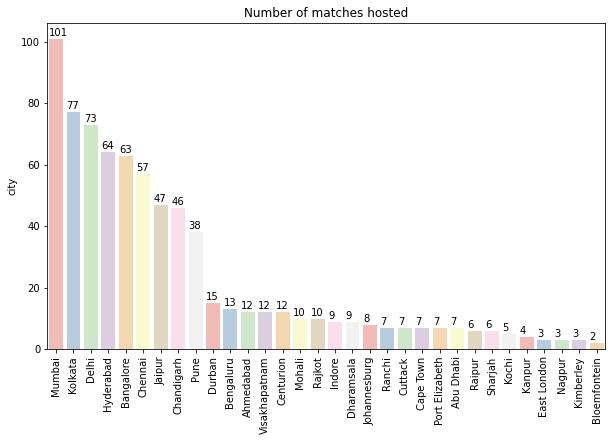

In [15]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
plt.title('Number of matches hosted')
count=0
cities=pd.DataFrame(city_host)
cities['name']=city_host.index
for i in cities['city']:
    plt.text(count-0.4,i+1,str(i),color='black')
    count+=1
sns.barplot(city_host.index, city_host, palette='Pastel1');

So, we can see in the barplot that Mumbai has hosted the maximum number of IPL matches followed by Kolkata and Delhi.



#### Analysis based on Teams

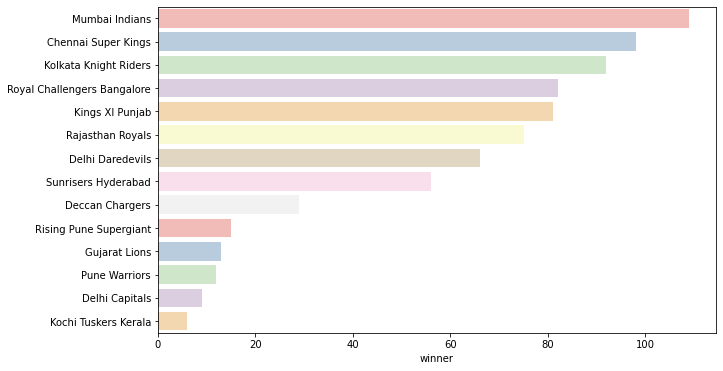

In [16]:
# Most successful team of ipl
plt.figure(figsize=(10,6))
data = df['winner'].value_counts()
sns.barplot(y = data.index, x = data, palette='Pastel1' )

From the above result, clearly, Mumbai Indians is the most successful team of ipl

In [17]:
# Top 5 teams 

most_wins = df.groupby(by = ['winner'] )['city'].value_counts()
most_wins.sort_values(ascending = False).head()

winner                 city     
Mumbai Indians         Mumbai       53
Kolkata Knight Riders  Kolkata      45
Chennai Super Kings    Chennai      40
Rajasthan Royals       Jaipur       32
Sunrisers Hyderabad    Hyderabad    30
Name: city, dtype: int64

As we can see Mumbai Indians has secured the most wins in the past 12 years. 

In [18]:
df['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings             98
Kolkata Knight Riders           92
Royal Challengers Bangalore     82
Kings XI Punjab                 81
Rajasthan Royals                75
Delhi Daredevils                66
Sunrisers Hyderabad             56
Deccan Chargers                 29
Rising Pune Supergiant          15
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                   9
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

In [19]:
# Top 5 venues where dl was appliesd the most 

# venue_dl = df.groupby(['venue'])['dl_applied'].value_counts()
# venue_dl.sort_values(ascending = False)

In [20]:
df['dl_applied'].value_counts()[1]


19

In [21]:
# wins per season 

wins_per_season = df.groupby('season')['winner'].value_counts()
wins_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [22]:
year = 2008
wins_per_season_df = pd.DataFrame(columns=['year', 'Team', 'Wins'])
for items in wins_per_season.iteritems():    
    if items[0][0]==year:
        print(items)
        win_series = pd.DataFrame({
            'year': [items[0][0]],
            'Team': [items[0][1]],
            'Wins': [items[1]]
        })
        wins_per_season_df = wins_per_season_df.append(win_series)
        year += 1   

((2008, 'Rajasthan Royals'), 13)
((2009, 'Delhi Daredevils'), 10)
((2010, 'Mumbai Indians'), 11)
((2011, 'Chennai Super Kings'), 11)
((2012, 'Kolkata Knight Riders'), 12)
((2013, 'Mumbai Indians'), 13)
((2014, 'Kings XI Punjab'), 11)
((2015, 'Chennai Super Kings'), 10)
((2016, 'Sunrisers Hyderabad'), 11)
((2017, 'Mumbai Indians'), 12)
((2018, 'Chennai Super Kings'), 11)
((2019, 'Mumbai Indians'), 11)


This gives us the most wins by teams for each season of IPL 

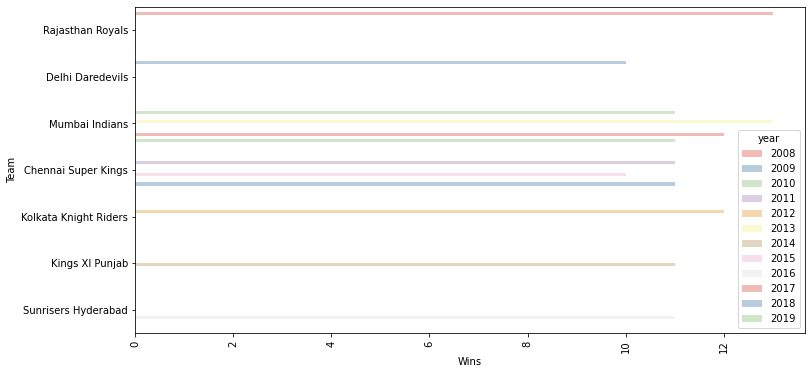

In [23]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.barplot('Wins', 'Team', hue='year', data=wins_per_season_df, palette='Pastel1')

From the bar plot we can see that Mumbai Indians has secured the most wins in 2010,2013,2017 and 2019

#### Analysis based on Toss

In [24]:
df['toss_decision'].value_counts()

field    455
bat      288
Name: toss_decision, dtype: int64

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

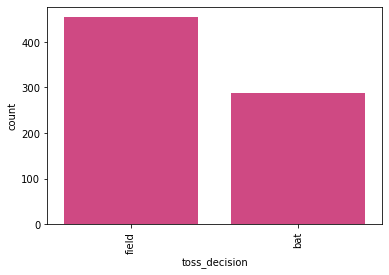

In [25]:
sns.countplot(x ='toss_decision', data = df ,color=(0.9, 0.2, 0.5, 0.2))
plt.xticks(rotation = 90)

From the above result, we can say that teams prefer to field first. As it is T-20 many teams prefer to chase the targets.

In [26]:
# Cases where toss winners won the match
toss_win_match = df[(df['toss_winner'] == df['winner'])]


In [27]:
# Cases where toss winners lost the match
toss_win_lose_match = df[(df['toss_winner'] != df['winner'])]

In [28]:
toss_df = pd.DataFrame({"Team won the toss":[ toss_win_match.shape[0],toss_win_lose_match.shape[0]  ]}, index = ['Match won', 'Match Lost']  )

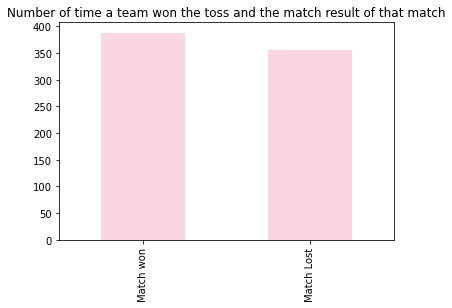

In [29]:
toss_df.plot( kind = 'bar' , legend = False , title = "Number of time a team won the toss and the match result of that match", color=(0.9, 0.2, 0.5, 0.2))

We can see that there is no significant effect of toss winners on winning mathches, but we can see that the matches won are slightly higher than those lost.

In [30]:
# Analysis based on the toss decision: bat or field

batting_first_won = df.loc[(df['toss_winner'] == df['winner']) & (df['toss_decision'] == 'bat'), ['id', 'winner']]
fielding_first_won = df.loc[(df['toss_winner'] == df['winner']) & (df['toss_decision'] == 'field'),  ['id', 'winner']]

In [31]:
batting_first_won_df = batting_first_won['winner'].value_counts()
fielding_first_won_df= fielding_first_won['winner'].value_counts()

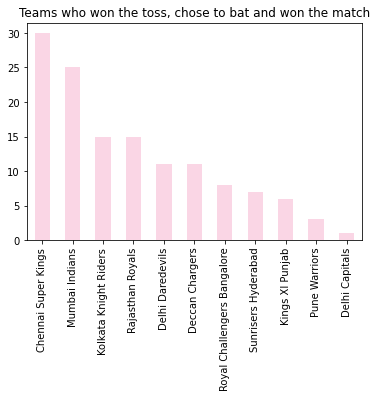

In [32]:
batting_first_won_df.plot(kind = 'bar', title = 'Teams who won the toss, chose to bat and won the match',color=(0.9, 0.2, 0.5, 0.2))

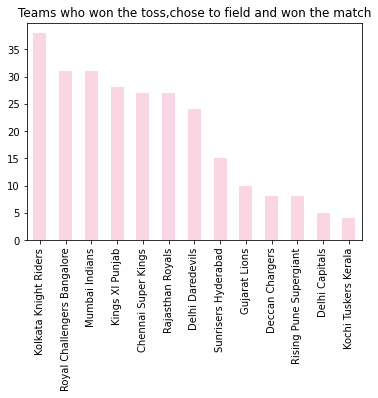

In [33]:
fielding_first_won_df.plot(kind = 'bar', title = 'Teams who won the toss,chose to field and won the match', color=(0.9, 0.2, 0.5, 0.2))

#### Analysis based on Duckworth–Lewis method

In [34]:
# Creating a new dataframe which holds records of matches where decision was made using the Duckworth–Lewis method

dl_data = df.loc[df['dl_applied'] != 0, ['id','season','Month','team1','team2','toss_winner','toss_decision','result','dl_applied','winner','venue']]

In [35]:
dl_data['venue'].value_counts()

Eden Gardens                                           4
M Chinnaswamy Stadium                                  3
Feroz Shah Kotla                                       3
Rajiv Gandhi International Stadium, Uppal              2
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium    2
Kingsmead                                              1
Nehru Stadium                                          1
Sawai Mansingh Stadium                                 1
SuperSport Park                                        1
Newlands                                               1
Name: venue, dtype: int64

We can see that the Duckworth–Lewis method was applied most in Eden Gardens which can mean that it rained the most in Kolkata

In [36]:
dl_data['toss_decision'].value_counts()

field    13
bat       6
Name: toss_decision, dtype: int64

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

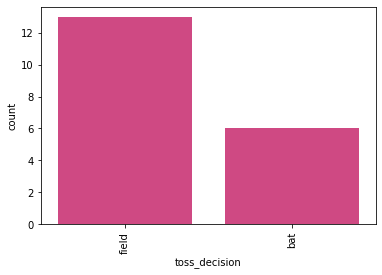

In [37]:
sns.countplot(x ='toss_decision', data = dl_data ,color=(0.9, 0.2, 0.5, 0.2))
plt.xticks(rotation = 90)

From the above result we can see that most teams chose to field on days when the Duckworth–Lewis method was applied to decide the winners. This could indicate that the captains must have had something in mind regarding the pitch, keeping in mind that it might rain on those days 

In [38]:
dl_wins = dl_data.groupby(by = 'toss_decision')['winner'].value_counts()
dl_wins

toss_decision  winner                     
bat            Chennai Super Kings            2
               Kolkata Knight Riders          2
               Kings XI Punjab                1
               Royal Challengers Bangalore    1
field          Delhi Daredevils               2
               Kolkata Knight Riders          2
               Rising Pune Supergiant         2
               Royal Challengers Bangalore    2
               Sunrisers Hyderabad            2
               Kings XI Punjab                1
               Kochi Tuskers Kerala           1
               Rajasthan Royals               1
Name: winner, dtype: int64

It is evident from the result above that more matches were won by the  Duckworth–Lewis method when the toss decision was to field first

#### Analysis based on Player of the match

In [39]:
players = df.player_of_match.value_counts()
players.head()

CH Gayle          21
AB de Villiers    20
RG Sharma         17
DA Warner         17
MS Dhoni          17
Name: player_of_match, dtype: int64

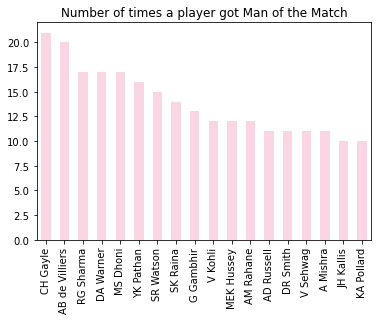

In [40]:
players[players >= 10 ].plot(kind = 'bar', title = 'Number of times a player got Man of the Match',color=(0.9, 0.2, 0.5, 0.2))

The above results show us that Chris Gayle and AB de Villiers are the players who were awarded player of the match most. This could mean that teams should try to invest on some of these players during the auction.

### Conclusion 

<p> Hence we can draw these conclusions: </p>
<ul>
    <li> Mumbai has hosted the maximum number of IPL matches </li>
    <li> Mumbai Indians is the most successful team of ipl since it has secured the most number of wins on the past 12 years         </li>
    <li> Teams prefer to field first. As it is T-20 many teams prefer to chase the targets. </li>
    <li> There is no significant effect of toss winners on winning mathches </li>
    <li> The Duckworth–Lewis method was applied most in Eden Gardens</li>
    <li> Chris Gayle and AB de Villiers are important players and teams should invest in them for advertisements and also for            the benefit of the team. </li>
</ul>
    